In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [4]:
import matplotlib.pyplot as plt

In [2]:
def indic(y):
    for i in range(y.shape[0]):
        if y[i]>0.5:
            y[i] = 1
        else:
            y[i] = 0
    return y

In [3]:
#setting up cross validation scheme
y1 = np.random.random((100,))
y1 = indic(y1)
y2 = y1

In [4]:
roc_auc_score(y1,y2)

1.0

In [5]:
y3 = np.random.random((100,))
roc_auc_score(y1, y3)

0.42181818181818176

In [2]:
app_tr = pd.read_csv('application_train.csv')
app_ts = pd.read_csv('application_test.csv')

In [7]:
#some summarization
app_tr.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
app_tr.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
OWN_CAR_AGE                       62
FLAG_MOBIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
F

In [9]:
app_ts.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [10]:
app_ts.nunique()

SK_ID_CURR                    48744
NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
CNT_CHILDREN                     11
AMT_INCOME_TOTAL                606
AMT_CREDIT                     2937
AMT_ANNUITY                    7491
AMT_GOODS_PRICE                 677
NAME_TYPE_SUITE                   7
NAME_INCOME_TYPE                  7
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                5
NAME_HOUSING_TYPE                 6
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    15477
DAYS_EMPLOYED                  7863
DAYS_REGISTRATION             12618
DAYS_ID_PUBLISH                5880
OWN_CAR_AGE                      52
FLAG_MOBIL                        2
FLAG_EMP_PHONE                    2
FLAG_WORK_PHONE                   2
FLAG_CONT_MOBILE                  2
FLAG_PHONE                        2
FLAG_EMAIL                        2
OCCUPATION_TYPE             

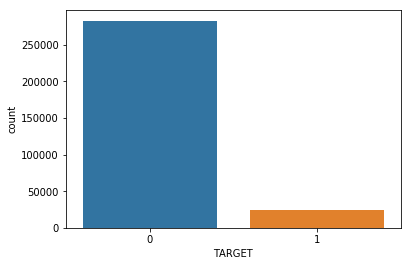

In [11]:
sns.countplot(x='TARGET', data=app_tr);

In [12]:
import matplotlib.pyplot as plt

/home/hari/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


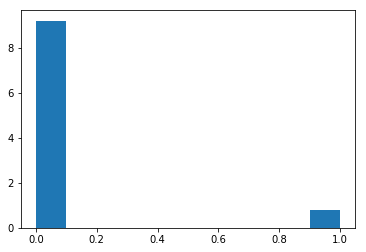

In [13]:
plt.hist(app_tr['TARGET'], normed=True);

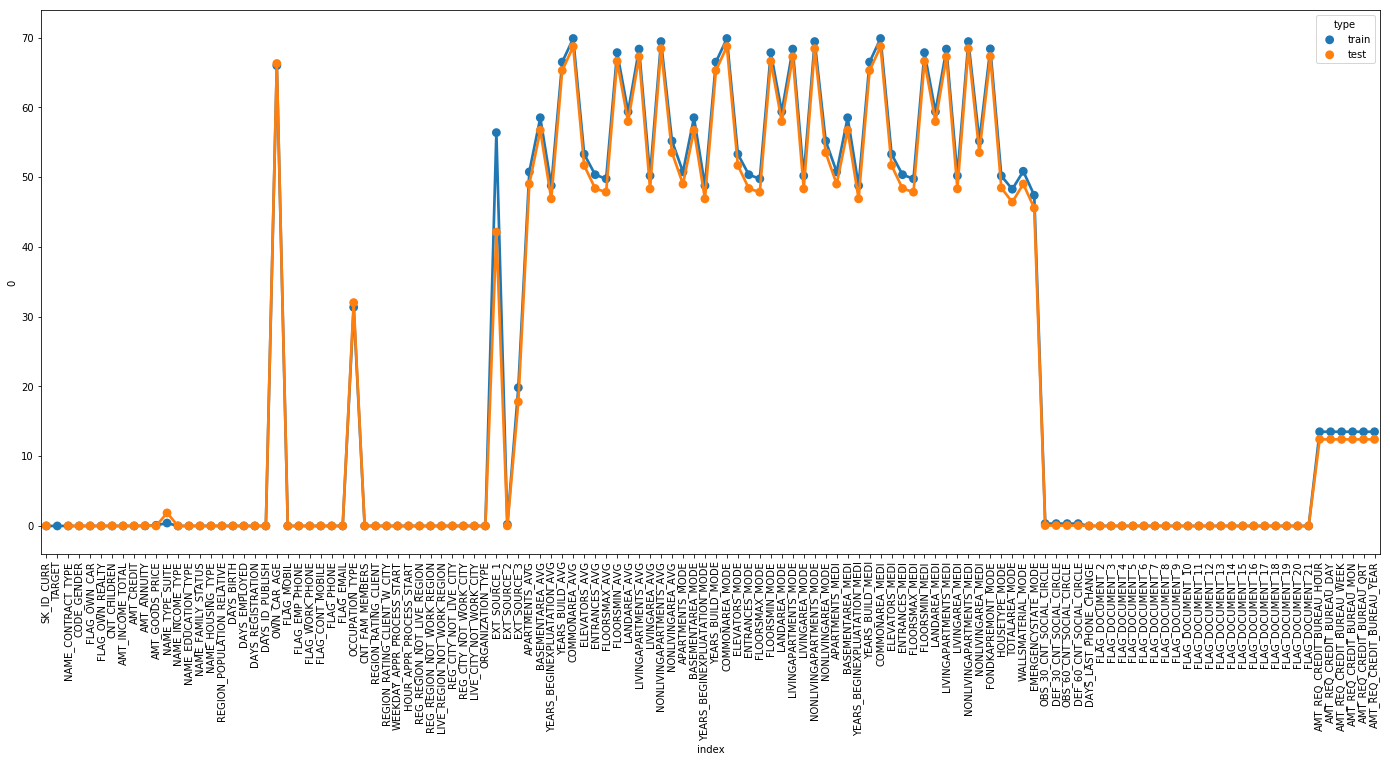

In [14]:
fig = plt.figure(figsize=(24,10))
train_miss = pd.DataFrame((app_tr.isnull().sum()*100)/app_tr.shape[0]).reset_index()
test_miss = pd.DataFrame((app_ts.isnull().sum()*100)/app_ts.shape[0]).reset_index()
train_miss['type'] = 'train'
test_miss['type'] = 'test'
missing = pd.concat([train_miss, test_miss], axis=0)
ax = sns.pointplot(x='index', y=0, data=missing, hue='type')
plt.xticks(rotation=90, fontsize=10)
plt.show()

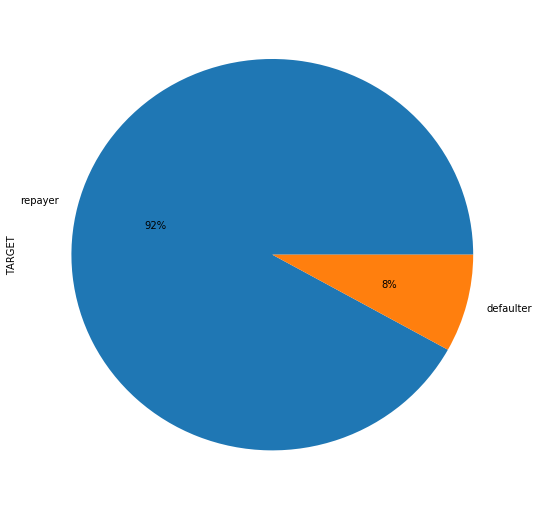

In [15]:
plt.figure(figsize=(9,9))
app_tr['TARGET'].value_counts().plot.pie(autopct='%1.0f%%',labels=['repayer','defaulter'])
plt.show()

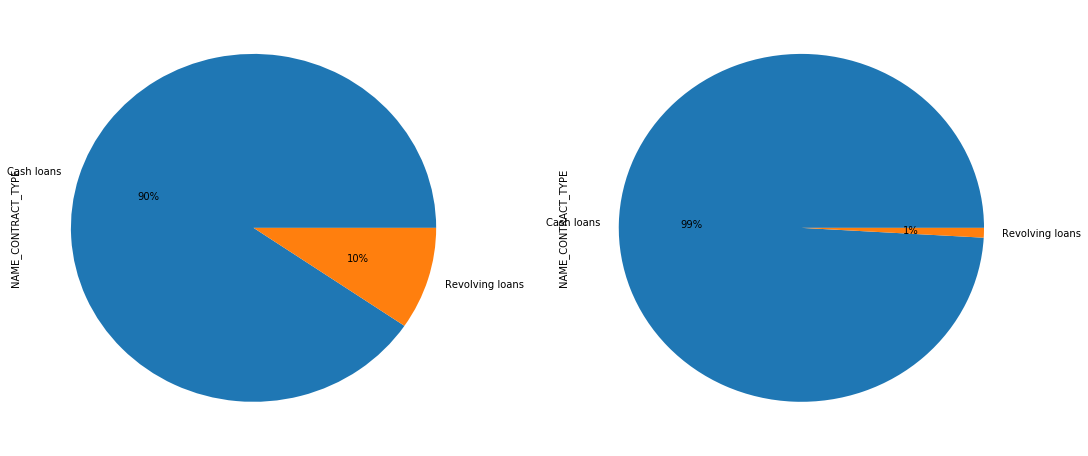

In [16]:
plt.figure(figsize=(18,8))
plt.subplot(121)
app_tr['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

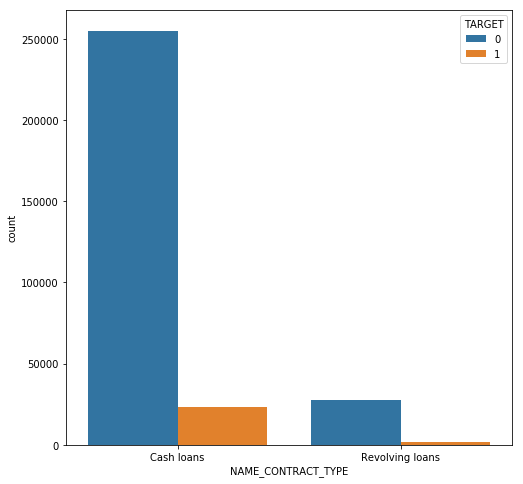

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(x='NAME_CONTRACT_TYPE', data=app_tr, hue='TARGET')
plt.show()

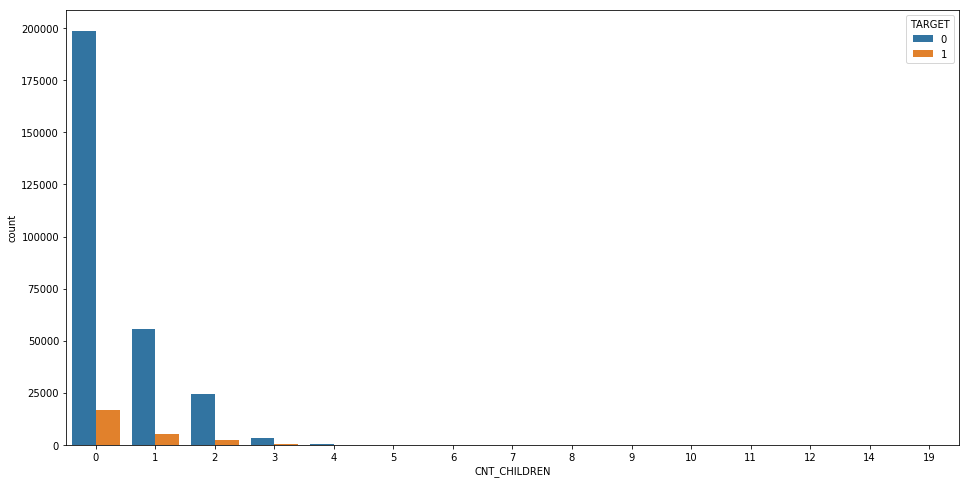

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x='CNT_CHILDREN', data=app_tr, hue='TARGET')
plt.show()

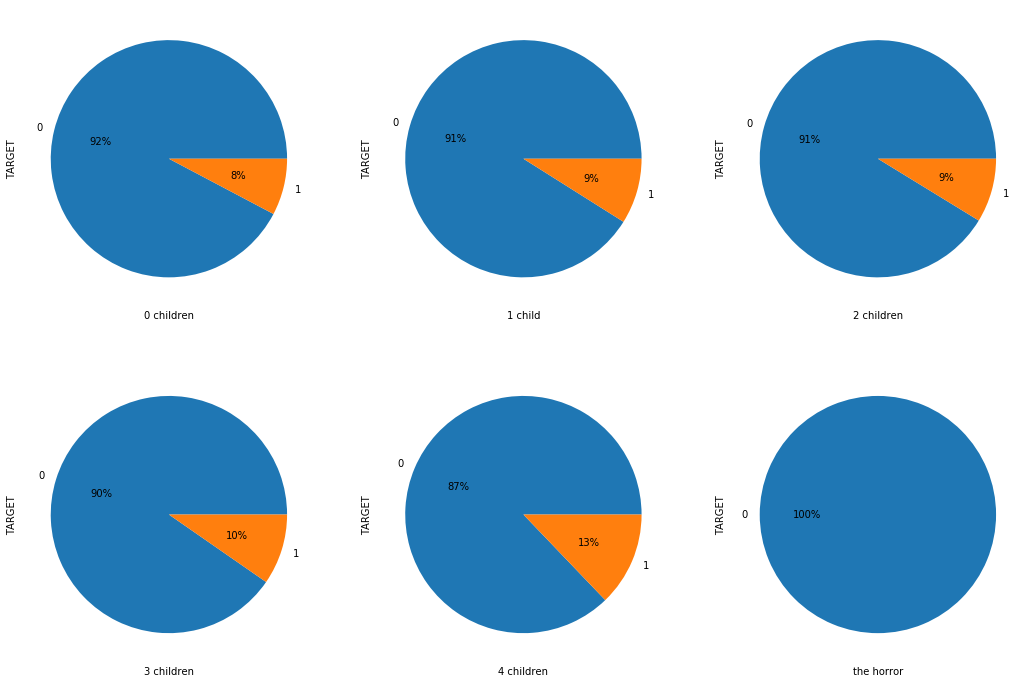

In [19]:
plt.figure(figsize=(18,12))
plt.subplot(231)
plt.xlabel('0 children')
app_tr[app_tr['CNT_CHILDREN']==0]['TARGET'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(232)
plt.xlabel('1 child')
app_tr[app_tr['CNT_CHILDREN']==1]['TARGET'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(233)
plt.xlabel('2 children')
app_tr[app_tr['CNT_CHILDREN']==2]['TARGET'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(234)
plt.xlabel('3 children')
app_tr[app_tr['CNT_CHILDREN']==3]['TARGET'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(235)
plt.xlabel('4 children')
app_tr[app_tr['CNT_CHILDREN']==4]['TARGET'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(236)
plt.xlabel('the horror')
app_tr[app_tr['CNT_CHILDREN']==19]['TARGET'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

we see the default rate increasing as the num of children increases, it's better to make the 19 children case into 4. This facilitates the algorithm to recognize pattern in the data.

In [20]:
app_tr[app_tr['CNT_CHILDREN']==19]['CNT_CHILDREN']

155369    19
265784    19
Name: CNT_CHILDREN, dtype: int64

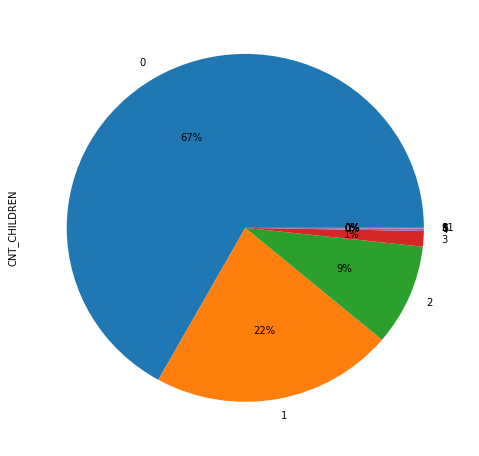

In [21]:
plt.figure(figsize=(8,8))
app_tr[app_tr['TARGET']==1]['CNT_CHILDREN'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

In [22]:
app_tr['CNT_CHILDREN'][155369] = 4
app_tr['CNT_CHILDREN'][265784] = 4

/home/hari/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/hari/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


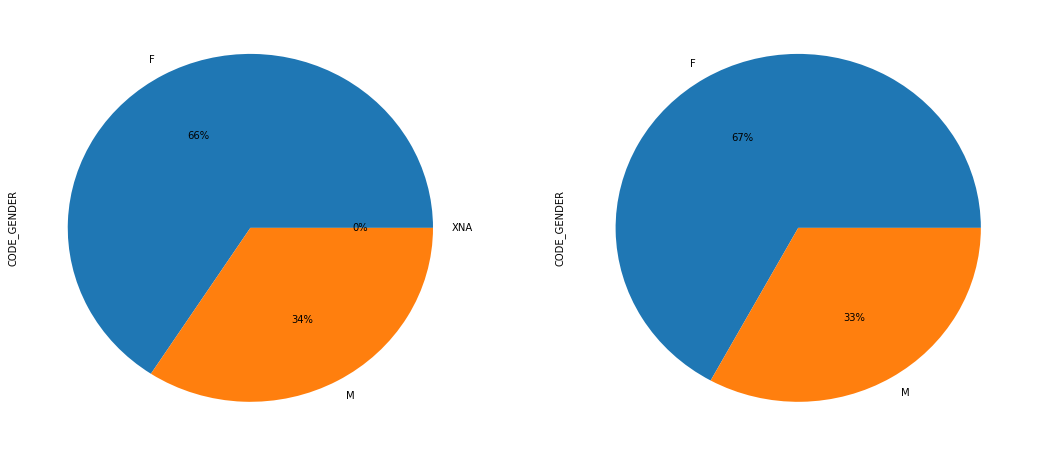

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(121)
app_tr['CODE_GENDER'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['CODE_GENDER'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

In [24]:
app_tr[app_tr['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


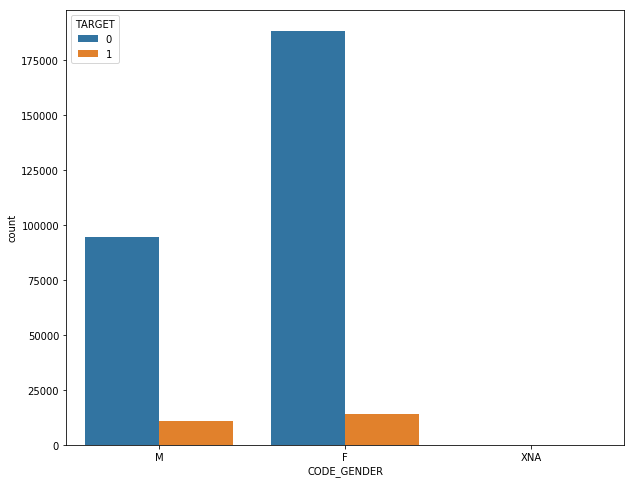

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x='CODE_GENDER', data=app_tr, hue='TARGET')
plt.show()

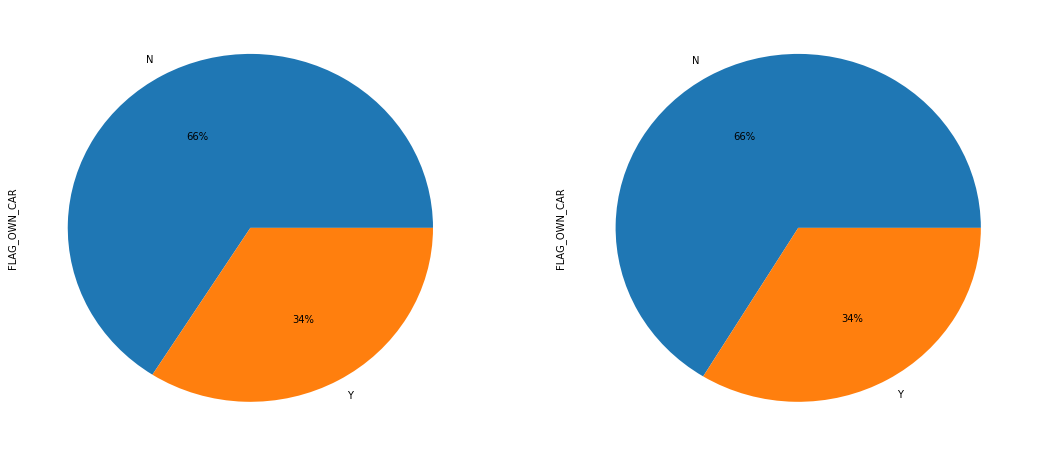

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(121)
app_tr['FLAG_OWN_CAR'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['FLAG_OWN_CAR'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

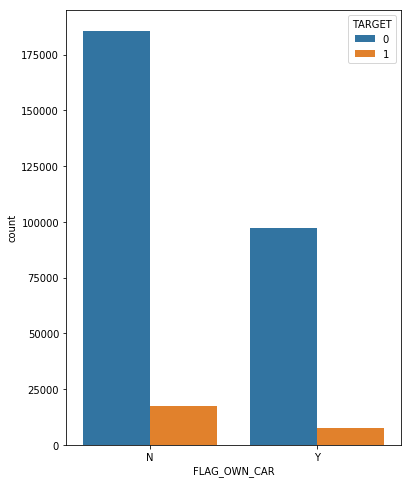

In [27]:
plt.figure(figsize=(6,8))
sns.countplot(x='FLAG_OWN_CAR', data=app_tr, hue='TARGET')
plt.show()

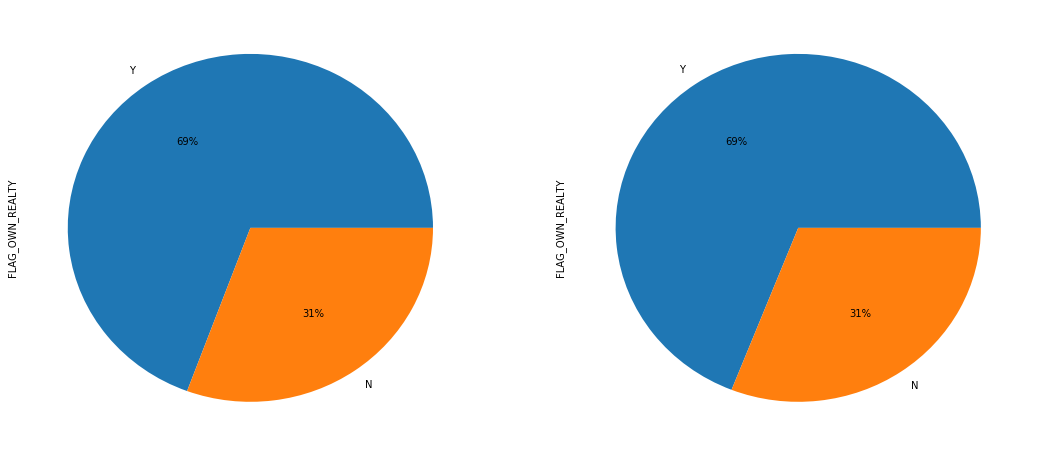

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(121)
app_tr['FLAG_OWN_REALTY'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['FLAG_OWN_REALTY'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

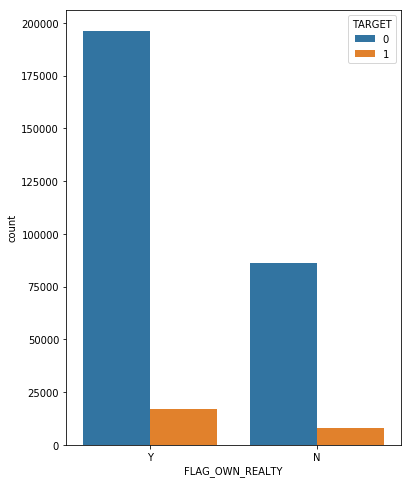

In [29]:
plt.figure(figsize=(6,8))
sns.countplot(x='FLAG_OWN_REALTY', data=app_tr, hue='TARGET')
plt.show()

/home/hari/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


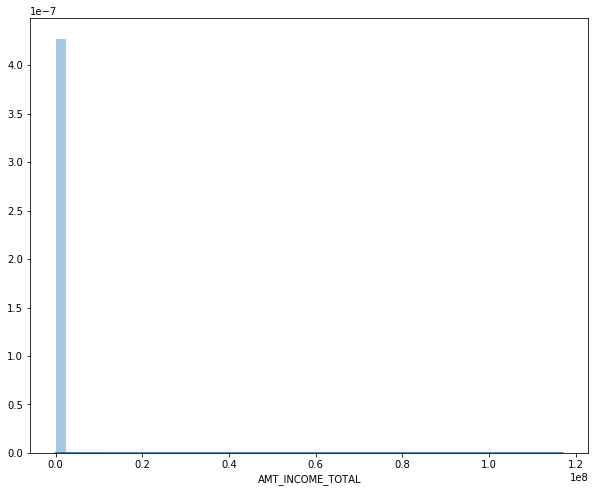

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(app_tr['AMT_INCOME_TOTAL'])
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


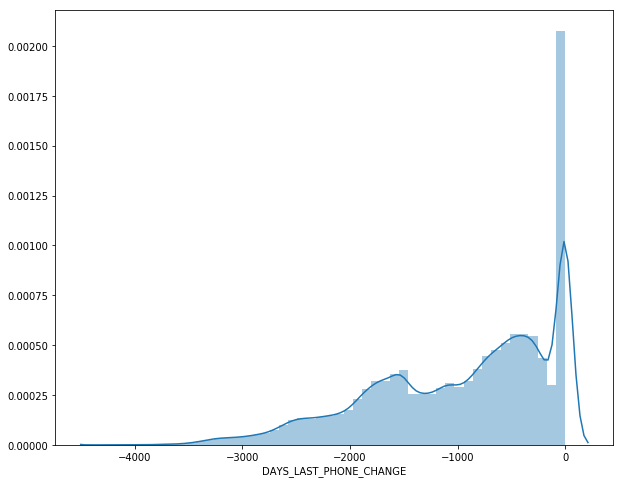

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(app_tr['DAYS_LAST_PHONE_CHANGE'].dropna())
plt.show()

In [7]:
app = pd.concat([app_tr, app_ts], axis=0)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [9]:
app['CREDIT_INCOME_RATIO'] = app['AMT_CREDIT']/app['AMT_INCOME_TOTAL']

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


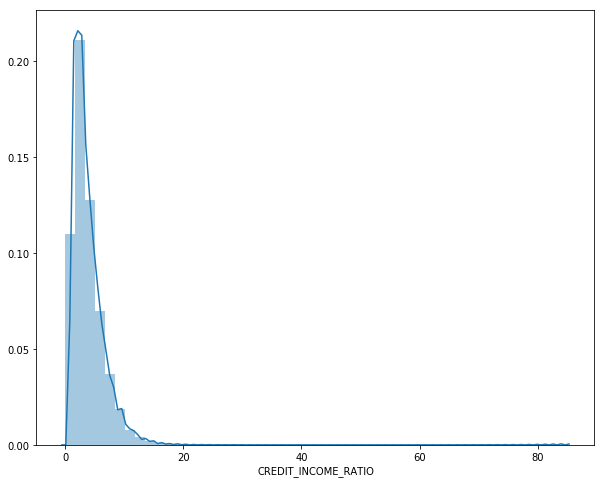

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(app['CREDIT_INCOME_RATIO'].dropna())
plt.show()

It's has too large of a negative skew probably a log or sqrt transformation will help

app_tr['AMT_INCOME_TOTAL'] = app_tr['AMT_INCOME_TOTAL'].apply(lambda x:np.log(1+x))

plt.figure(figsize=(10,8))
sns.distplot(app_tr['AMT_INCOME_TOTAL'])
plt.show()

app_tr['AMT_INCOME_TOTAL'] = app_tr['AMT_INCOME_TOTAL'].apply(lambda x:np.sqrt(x))

plt.figure(figsize=(10,8))
sns.distplot(app_tr['AMT_INCOME_TOTAL'])
plt.show()

AMT_INCOME_TOTAL has decimal points in some entries could be worth something.

plt.figure(figsize=(10,8))
sns.distplot(app_tr['AMT_CREDIT'])
plt.show()

app_tr['AMT_CREDIT'] = app_tr['AMT_CREDIT'].apply(lambda x:np.log(1+x))

plt.figure(figsize=(10,8))
sns.distplot(app_tr['AMT_CREDIT'])
plt.show()

In [31]:
app_tr[app_tr['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [32]:
def indic(x):
    if x:
        return 1
    else:
        return 0

In [33]:
app_tr[app_tr['AMT_GOODS_PRICE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
7880,109190,1,Revolving loans,F,N,N,0,121500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
7995,109322,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
10819,112595,0,Revolving loans,F,N,Y,0,90000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11287,113148,0,Revolving loans,F,N,Y,4,225000.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
13008,115162,0,Revolving loans,F,N,Y,1,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


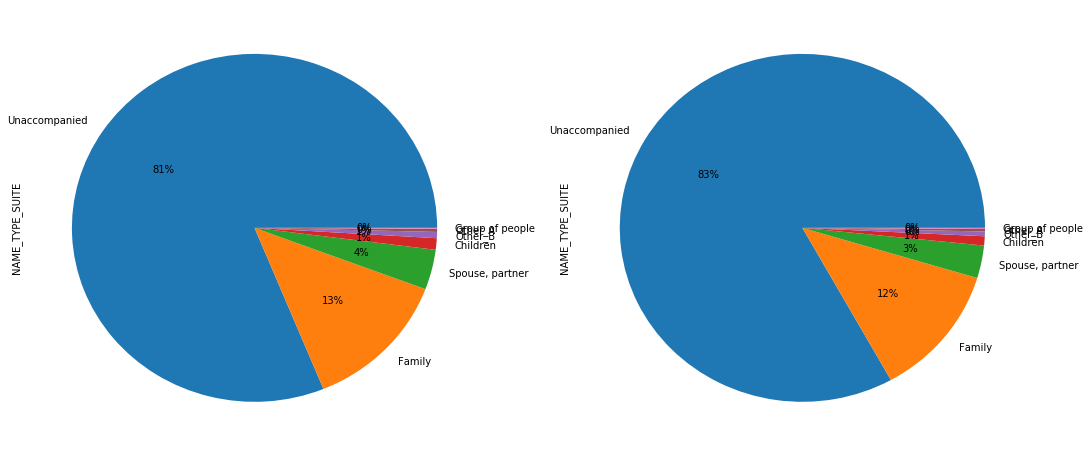

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(121)
app_tr['NAME_TYPE_SUITE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['NAME_TYPE_SUITE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

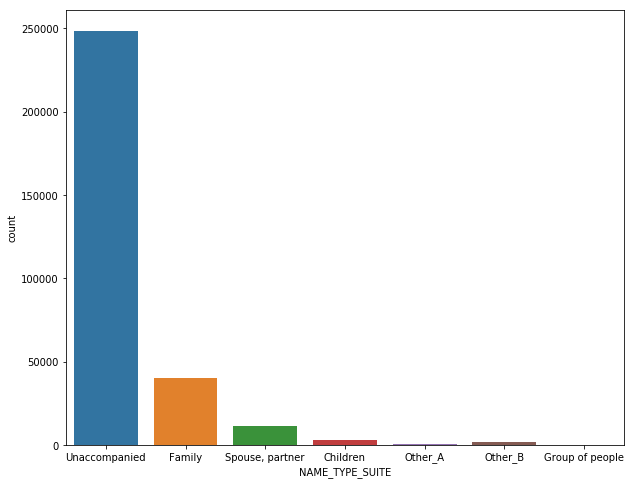

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x='NAME_TYPE_SUITE', data=app_tr)
plt.show()

In [36]:
app_tr['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

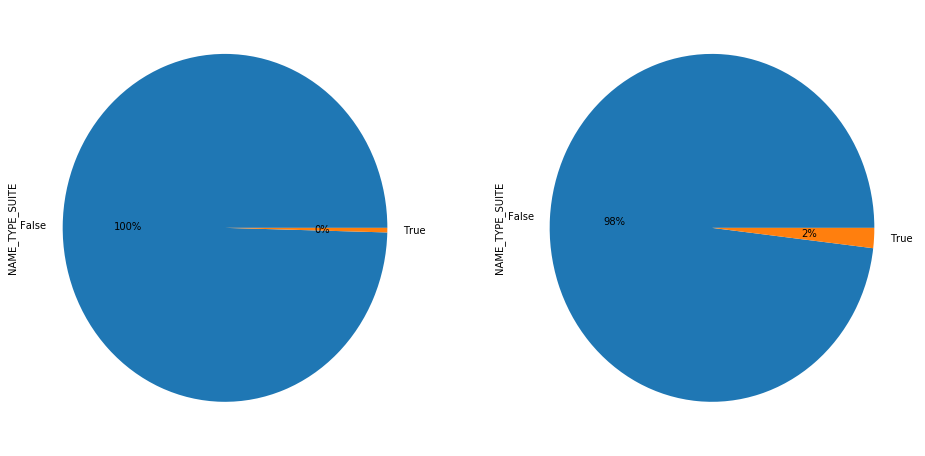

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(121)
app_tr['NAME_TYPE_SUITE'].isnull().value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['NAME_TYPE_SUITE'].isnull().value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

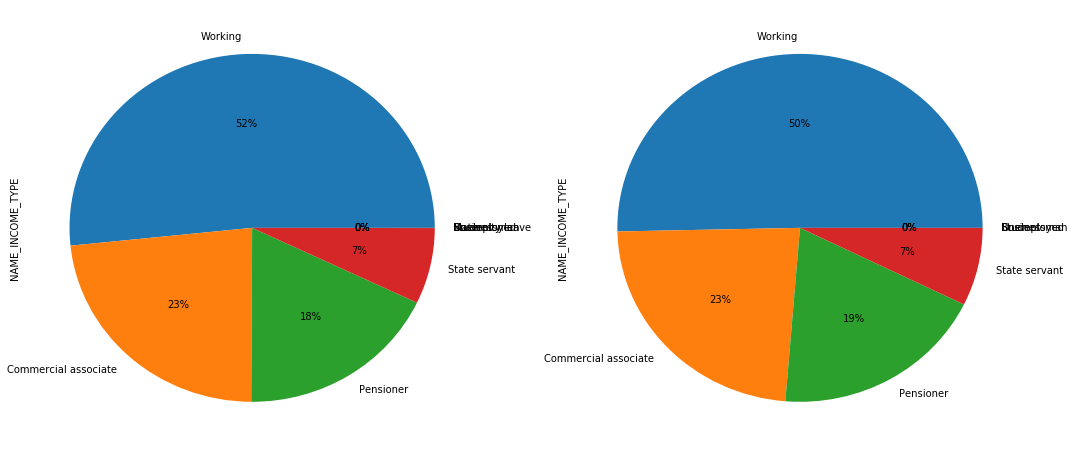

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(121)
app_tr['NAME_INCOME_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['NAME_INCOME_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

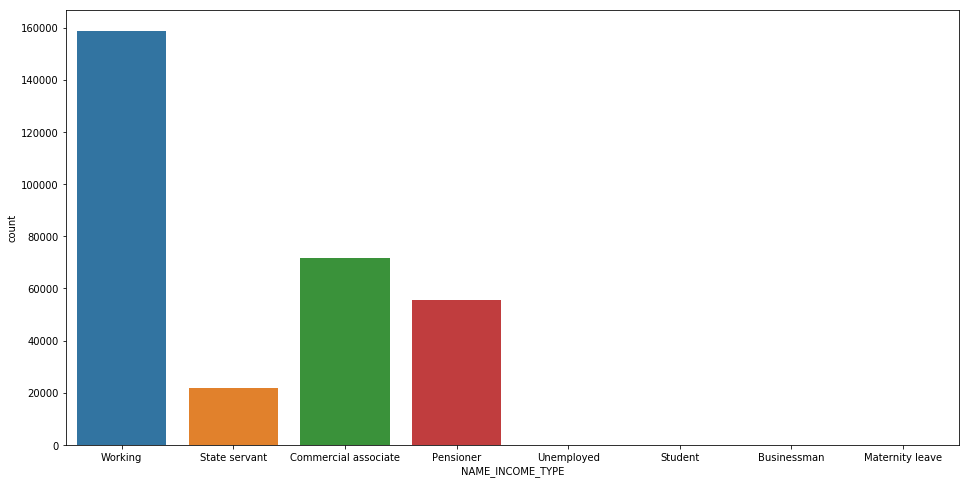

In [39]:
plt.figure(figsize=(16,8))
sns.countplot(x='NAME_INCOME_TYPE', data=app_tr)
plt.show()

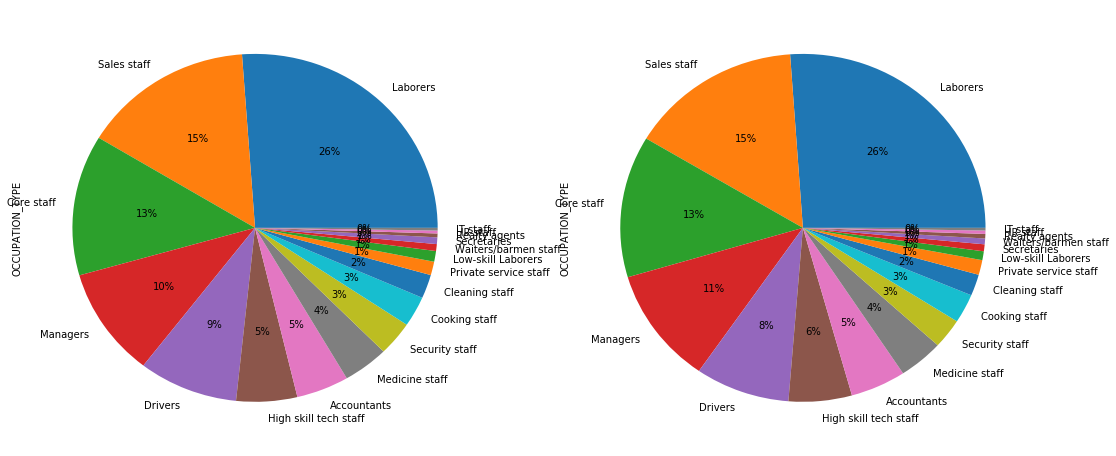

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(121)
app_tr['OCCUPATION_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.subplot(122)
app_ts['OCCUPATION_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

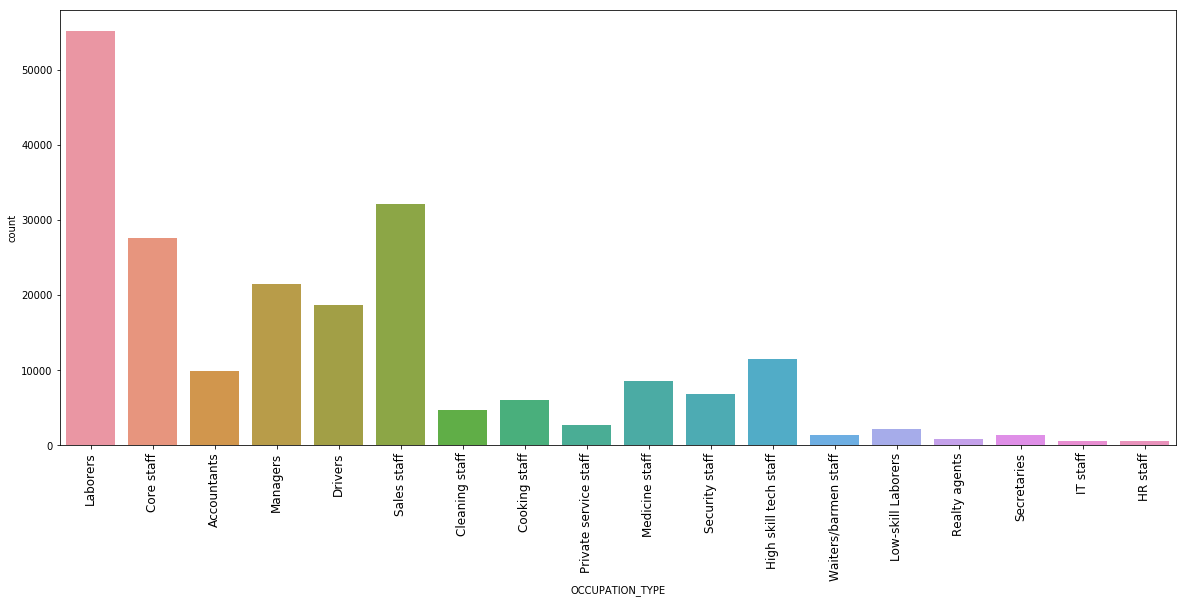

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(x='OCCUPATION_TYPE', data=app_tr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

<Figure size 2880x1800 with 0 Axes>

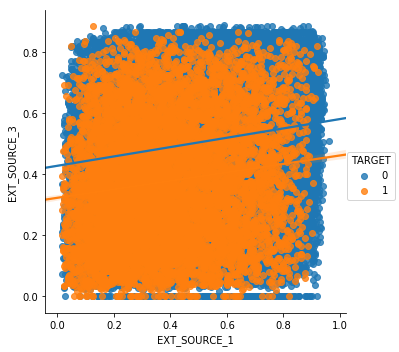

In [42]:
plt.figure(figsize=(40,25))
sns.lmplot(x='EXT_SOURCE_1', y='EXT_SOURCE_3', data=app_tr, hue='TARGET')
plt.show()

<Figure size 2880x1800 with 0 Axes>

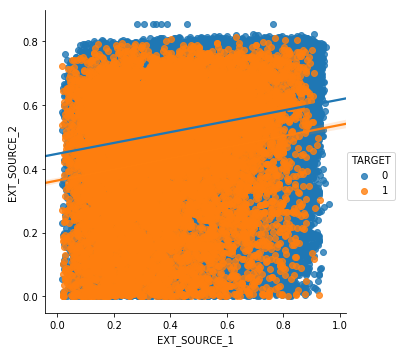

In [53]:
plt.figure(figsize=(40,25))
sns.lmplot(x='EXT_SOURCE_1', y='EXT_SOURCE_2', data=app_tr, hue='TARGET')
plt.show()

In [43]:
home_cols=['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG']

<Figure size 864x864 with 0 Axes>

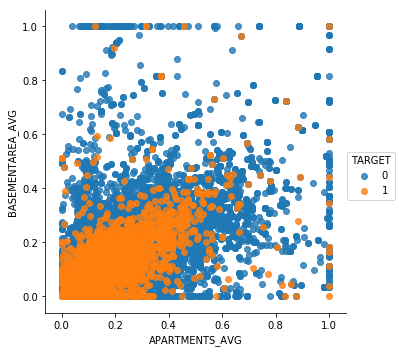

In [44]:
plt.figure(figsize=(12,12))
sns.lmplot(x='APARTMENTS_AVG', y='BASEMENTAREA_AVG', data=app_tr, hue='TARGET', fit_reg=False)
plt.show()

<Figure size 864x864 with 0 Axes>

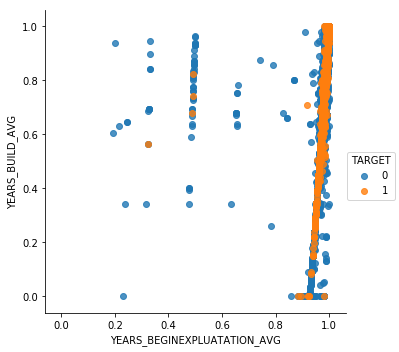

In [45]:
plt.figure(figsize=(12,12))
sns.lmplot(x='YEARS_BEGINEXPLUATATION_AVG', y='YEARS_BUILD_AVG', data=app_tr, hue='TARGET', fit_reg=False)
plt.show()

<Figure size 864x864 with 0 Axes>

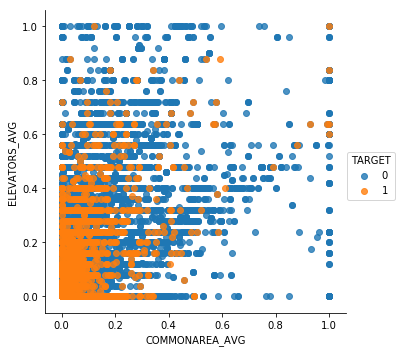

In [46]:
plt.figure(figsize=(12,12))
sns.lmplot(x='COMMONAREA_AVG', y='ELEVATORS_AVG', data=app_tr, hue='TARGET', fit_reg=False)
plt.show()

<Figure size 864x864 with 0 Axes>

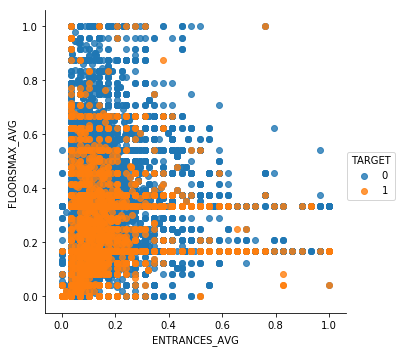

In [47]:
plt.figure(figsize=(12,12))
sns.lmplot(x='ENTRANCES_AVG', y='FLOORSMAX_AVG', data=app_tr, hue='TARGET', fit_reg=False)
plt.show()

<Figure size 864x864 with 0 Axes>

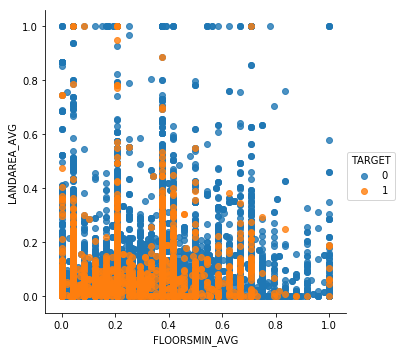

In [48]:
plt.figure(figsize=(12,12))
sns.lmplot(x='FLOORSMIN_AVG', y='LANDAREA_AVG', data=app_tr, hue='TARGET', fit_reg=False)
plt.show()

In [49]:
home_cols.append('TARGET')

In [50]:
home_cols

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'TARGET']

In [ ]:
plt.figure(figsize=(14,14))
sns.lmplot()